<a href="https://colab.research.google.com/github/vidhya2324/Machine_learning/blob/main/Stock_market_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [3]:
!kaggle datasets download -d luisandresgarcia/stock-market-prediction

Dataset URL: https://www.kaggle.com/datasets/luisandresgarcia/stock-market-prediction
License(s): Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)
 80% 33.0M/41.5M [00:00<00:00, 155MB/s] 
100% 41.5M/41.5M [00:00<00:00, 124MB/s]


In [4]:
!unzip \*.zip && rm *.zip

Archive:  stock-market-prediction.zip
  inflating: infolimpioavanzadoTarget.csv  


In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#load the dataset

In [6]:
df_stock = pd.read_csv('/content/infolimpioavanzadoTarget.csv')
df_stock.head()


,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.919758,-1.900001,-9.664295,0
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.110440,-1.379999,-7.247895,0
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.889560,-0.930000,-5.201344,0
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.497843,-0.360000,-2.177856,0
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.188956,-0.120000,-0.758054,0


In [10]:
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7781 entries, 0 to 7780
Columns: 1285 entries, date to TARGET
dtypes: float64(1280), int64(3), object(2)
memory usage: 76.3+ MB


In [8]:
df_stock.describe()

,open,high,low,close,adjclose,volume,RSIadjclose15,RSIvolume15,RSIadjclose25,RSIvolume25,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
count,7781.000000,7781.000000,7781.000000,7781.000000,7781.000000,7.781000e+03,7316.000000,7316.000000,7006.000000,7006.000000,...,7347.000000,7262.000000,7194.000000,7262.000000,7194.000000,7194.000000,7566.000000,7626.000000,7626.000000,7781.000000
mean,34.990220,35.655999,34.301243,34.964414,34.483147,7.586022e+05,46.817434,49.814790,46.966016,49.898659,...,37.947291,18.673824,18.704812,18.673824,18.704812,0.298413,inf,-0.259186,-2.674224,0.183010
std,99.841502,101.451058,98.073945,99.790823,98.603879,3.934491e+06,11.672838,5.002664,8.760961,3.420371,...,107.340294,75.723295,74.210933,75.723295,74.210933,14.661948,NaN,7.334250,268.268134,0.386699
min,0.410000,0.435000,0.405000,0.408000,0.408000,0.000000e+00,6.837461,35.303213,17.693637,39.520876,...,0.510000,-668.212635,-626.263336,-668.212635,-626.263336,-211.219037,0.000000,-90.538818,-23399.465955,0.000000
25%,4.050000,4.130000,3.980000,4.030000,3.960000,1.080000e+04,38.946316,47.182234,40.954487,48.266978,...,4.565000,6.153839,8.336837,6.153839,8.336837,-6.585432,0.637237,-0.417873,-4.494383,0.000000
50%,10.080000,10.110000,10.005000,10.080000,10.061000,8.406000e+04,46.259711,48.356834,46.459477,48.961162,...,10.640000,28.484828,28.478797,28.484828,28.478797,0.000000,1.000000,-0.025000,-0.304004,0.000000
75%,24.350000,24.500000,24.080000,24.250000,22.466007,6.724000e+05,54.061089,50.902284,52.289893,50.527067,...,25.170000,59.688404,58.664021,59.688404,58.664021,6.726947,1.655385,0.240000,2.812552,0.000000
max,795.739990,799.359985,784.960022,797.489990,783.376221,1.615550e+08,96.365095,99.622735,91.023108,97.782293,...,799.359985,100.000000,100.000000,100.000000,100.000000,198.156313,inf,120.256775,425.000000,1.000000


In [9]:
df_stock.shape

(7781, 1285)

In [11]:
df_stock.isnull().sum()

date                  0
open                  0
high                  0
low                   0
close                 0
                   ... 
stochastic-kd-15    587
volumenrelativo     215
diff                155
INCREMENTO          155
TARGET                0
Length: 1285, dtype: int64

#Select features with that are highly correlated

In [12]:
data_new = df_stock[['date','open', 'high', 'low', 'close']]
data_new

,date,open,high,low,close
0,2022-01-03,17.799999,18.219000,17.500000,17.760000
1,2022-01-04,17.700001,18.309999,17.620001,17.660000
2,2022-01-05,17.580000,17.799999,16.910000,16.950001
3,2022-01-06,16.650000,16.879999,16.139999,16.170000
4,2022-01-07,16.219999,16.290001,15.630000,15.710000
...,...,...,...,...,...
7776,2022-12-23,23.250000,23.540001,23.250000,23.290001
7777,2022-12-27,23.350000,23.610001,23.250000,23.350000
7778,2022-12-28,23.450001,23.570000,23.219999,23.350000
7779,2022-12-29,23.330000,23.740000,23.330000,23.610001


In [13]:
data_new.isnull().sum()

date     0
open     0
high     0
low      0
close    0
dtype: int64

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

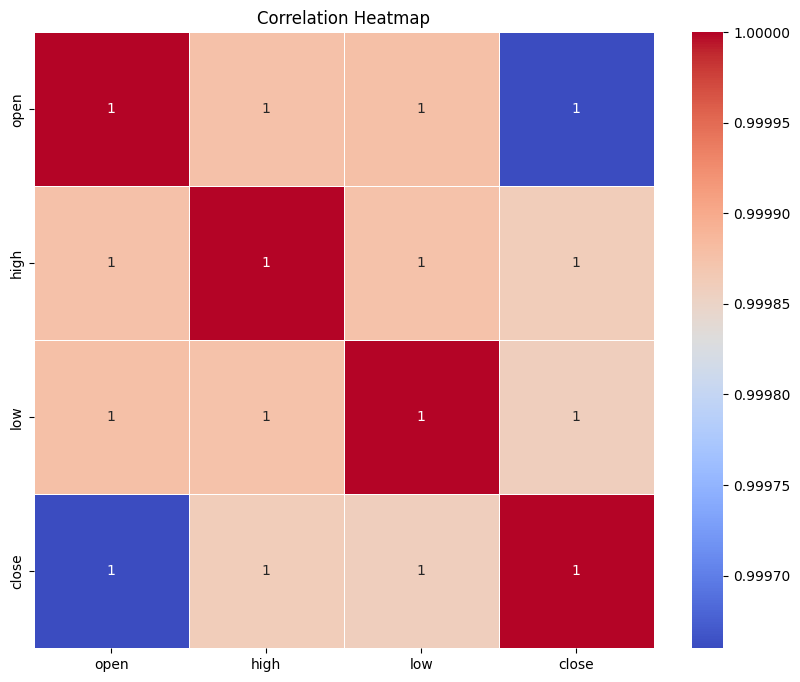

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix excluding the 'date' column
correlation_matrix = data_new[['open', 'high', 'low', 'close']].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

#Adding another column to have the start stock value for the next day

In [17]:
data_new["tomorrow"]= data_new["close"].shift(-1)
data_new

<ipython-input-17-5314dd1e6995>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new["tomorrow"]= data_new["close"].shift(-1)


,date,open,high,low,close,tomorrow
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.660000
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,16.950001
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.170000
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,15.710000
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.860000
...,...,...,...,...,...,...
7776,2022-12-23,23.250000,23.540001,23.250000,23.290001,23.350000
7777,2022-12-27,23.350000,23.610001,23.250000,23.350000,23.350000
7778,2022-12-28,23.450001,23.570000,23.219999,23.350000,23.610001
7779,2022-12-29,23.330000,23.740000,23.330000,23.610001,23.610001


#Create a target to return a boolean from the difference in stock value from previous day

In [18]:
data_new["target"] = data_new["tomorrow"] > data_new["close"].astype(float)
data_new

<ipython-input-18-5425aff5bc51>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new["target"] = data_new["tomorrow"] > data_new["close"].astype(float)


,date,open,high,low,close,tomorrow,target
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.660000,False
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,16.950001,False
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.170000,False
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,15.710000,False
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.860000,True
...,...,...,...,...,...,...,...
7776,2022-12-23,23.250000,23.540001,23.250000,23.290001,23.350000,True
7777,2022-12-27,23.350000,23.610001,23.250000,23.350000,23.350000,False
7778,2022-12-28,23.450001,23.570000,23.219999,23.350000,23.610001,True
7779,2022-12-29,23.330000,23.740000,23.330000,23.610001,23.610001,False


#Import Machine learning library which has less tendency to overfit and can detect non linear patterns.

In [19]:
#For Decision Tree
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200, min_samples_split= 100, random_state=1)

In [20]:
train = data_new.iloc[:-100]
test = data_new.iloc[-100:]


In [21]:
predictors = ["open", "high", "low", "close"] #Execpt the datetime so that the model doesnt train on it. So as to prevent data leakage
model.fit(train[predictors], train["target"])

RandomForestClassifier(min_samples_split=100, n_estimators=200, random_state=1)

#Check level of accuracy with precision_score

In [22]:
from sklearn.metrics import precision_score
pred = model.predict(test[predictors])


In [23]:
pred

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True,  True,  True, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False,  True,  True, False,  True,  True,  True,
        True])